
****The App is a mobile tool that allows users to scan documents, and its revenue model involves a subscription service. Users are offered a 7-day trial period, after which they are required to pay $4.99 per week. To download the App and register for a subscription and payment, please use the link provided below. Each row in the registration and payment database represents a separate event, such as signing up for a trial subscription or making a payment after the trial period ends.****

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from operator import attrgetter

In [2]:
df = pd.read_excel('C:/Users/Максим/Desktop/Test/test case data analyst.xlsx',
                    sheet_name='raw data',
                    dtype={'product_id' : str, 'quantity' : int, 'is_trial_period' : bool, 'user_id' : int},
                    parse_dates=['purchase_date'])
df.head()

,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657


****1. It is necessary to calculate the user's current LTV using cohort analysis.****

In [3]:
df['revenue'] = [0 if df['is_trial_period'][x] == True else 4.99 for x in range(len(df))]
df['cohort'] = df.groupby('user_id')['purchase_date'].transform('min').dt.to_period('W')
df['subscription_week'] = df['purchase_date'].dt.to_period('W')
df

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue,cohort,subscription_week
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222,4.99,2020-02-10/2020-02-16,2020-02-17/2020-02-23
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402,4.99,2020-02-10/2020-02-16,2020-02-17/2020-02-23
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991,4.99,2020-02-10/2020-02-16,2020-02-17/2020-02-23
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582,4.99,2020-02-10/2020-02-16,2020-02-17/2020-02-23
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657,4.99,2020-01-13/2020-01-19,2020-02-10/2020-02-16
...,...,...,...,...,...,...,...,...
114195,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-04,8291100,0.00,2019-12-30/2020-01-05,2019-12-30/2020-01-05
114196,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-02,8236936,0.00,2019-12-30/2020-01-05,2019-12-30/2020-01-05
114197,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-03,8247910,0.00,2019-12-30/2020-01-05,2019-12-30/2020-01-05
114198,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-04,8294146,0.00,2019-12-30/2020-01-05,2019-12-30/2020-01-05


In [4]:
cohorts = df.groupby(['cohort', 'subscription_week']).agg({'user_id': pd.Series.nunique, 'revenue': np.sum})

cohorts.rename(columns={'user_id': 'total_unique_users',
                         'revenue': 'total_revenue'}, inplace=True)
cohorts = cohorts.reset_index()

cohorts['period_number'] = (cohorts.subscription_week - cohorts.cohort).apply(attrgetter('n'))+1

cohorts.head(10)

,cohort,subscription_week,total_unique_users,total_revenue,period_number
0,2019-12-30/2020-01-05,2019-12-30/2020-01-05,6629,24.95,1
1,2019-12-30/2020-01-05,2020-01-06/2020-01-12,2468,12295.36,2
2,2019-12-30/2020-01-05,2020-01-13/2020-01-19,2027,10114.73,3
3,2019-12-30/2020-01-05,2020-01-20/2020-01-26,1788,8927.11,4
4,2019-12-30/2020-01-05,2020-01-27/2020-02-02,1635,8153.66,5
5,2019-12-30/2020-01-05,2020-02-03/2020-02-09,1489,7435.10,6
6,2019-12-30/2020-01-05,2020-02-10/2020-02-16,1343,6701.57,7
7,2019-12-30/2020-01-05,2020-02-17/2020-02-23,326,1616.76,8
8,2020-01-06/2020-01-12,2020-01-06/2020-01-12,8429,14.97,1
9,2020-01-06/2020-01-12,2020-01-13/2020-01-19,2916,14540.86,2


In [5]:
cohort_revenue = cohorts.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'total_revenue')

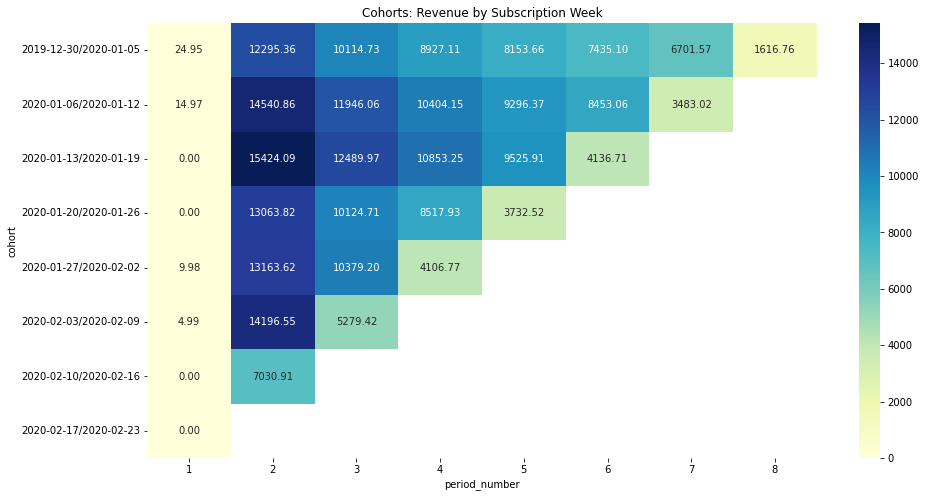

In [6]:
plt.figure(figsize=(15, 8))
plt.title('Cohorts: Revenue by Subscription Week')
sns.heatmap(cohort_revenue, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0)
plt.show()

In [7]:
cohort_retention = cohorts.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'total_unique_users')

cohort_size = cohort_retention.iloc[:,0]
cohort_retention = cohort_retention.divide(cohort_size, axis = 0)

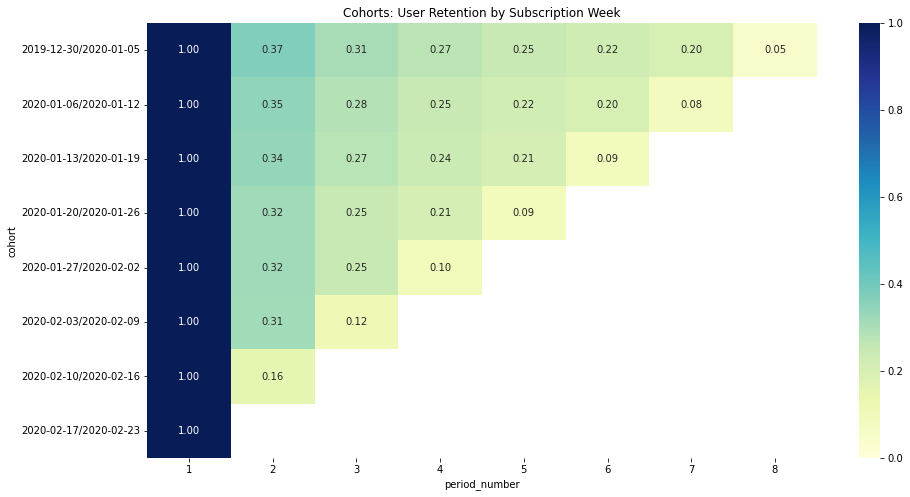

In [8]:
plt.figure(figsize=(15, 8))
plt.title('Cohorts: User Retention by Subscription Week')
sns.heatmap(cohort_retention, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0)
plt.show()

In [9]:
churn = 1 - cohort_retention

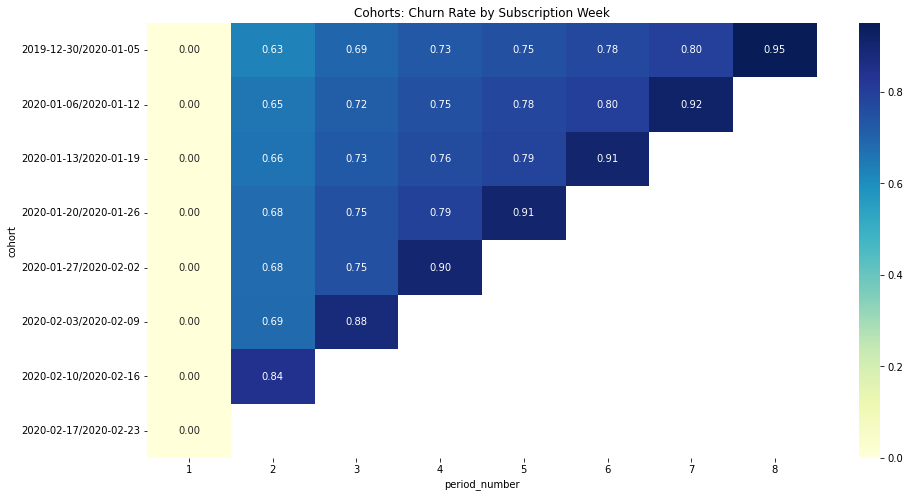

In [10]:
plt.figure(figsize=(15, 8))
plt.title('Cohorts: Churn Rate by Subscription Week')
sns.heatmap(churn, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0)
plt.show()

In [11]:
cohort_arpu = cohort_revenue.divide(cohort_size, axis=0)

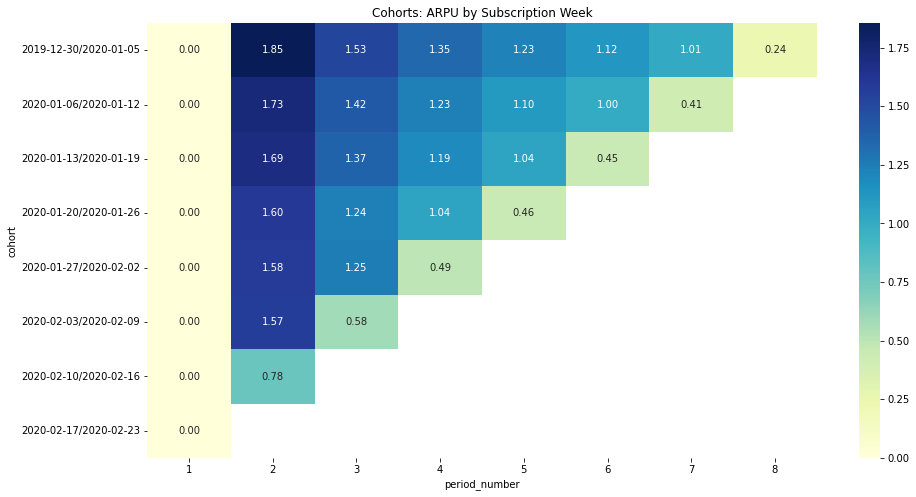

In [12]:
plt.figure(figsize=(15, 8))
plt.title('Cohorts: ARPU by Subscription Week')
sns.heatmap(cohort_arpu, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0)
plt.show()

In [13]:
#Customer’s lifetime value (LTV)= average revenue per user (ARPU) / weekly churn rate
ltv = cohort_arpu.divide(churn)
ltv_cum = ltv.replace([np.inf, -np.inf], np.nan).copy()
ltv_cum = ltv_cum.cumsum(axis=1, skipna=True)

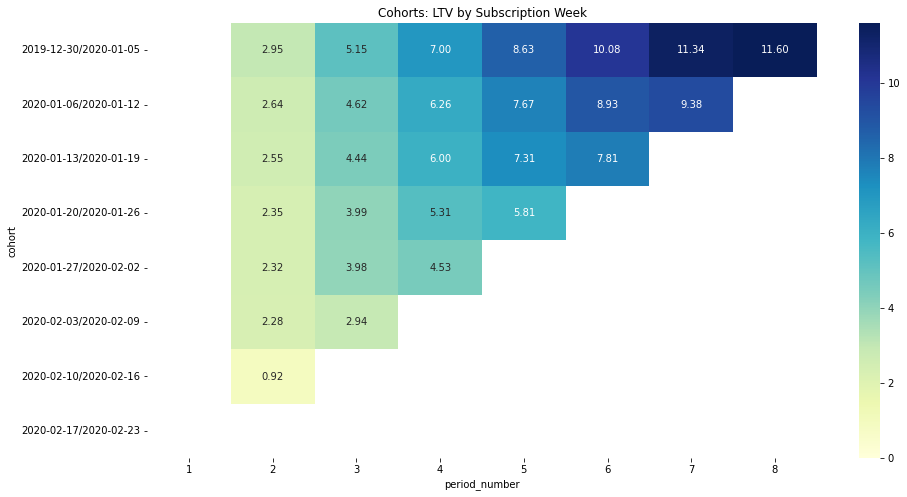

In [14]:
plt.figure(figsize=(15, 8))
plt.title('Cohorts: LTV by Subscription Week')
sns.heatmap(ltv_cum, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0)
plt.show()

**2. Predict how LTV will be for six months.**

The equation of a logarithmic regression model takes the following form:

y = a + b*ln(x)

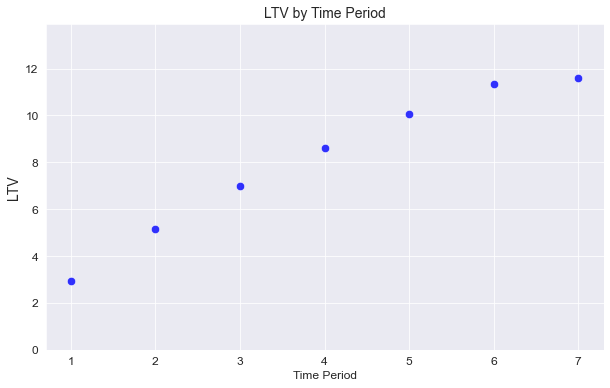

In [15]:
x = np.arange(1, 8, 1)
y = np.array(ltv_cum.iloc[0,1:])

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='blue', alpha=0.8, s=70)
plt.title('LTV by Time Period', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('LTV', fontsize=14)
plt.ylim([0, max(y)*1.2])
plt.tick_params(axis='both', labelsize=12)

plt.show()

In [16]:
fit = np.polyfit(np.log(x), y, 1)

In [17]:
print(f"y = {fit[1]} + {fit[0]}ln(x)")

y = 2.3872103474500803 + 4.697153034337913ln(x)


In [18]:
#LTV for half a year (26 weeks)
print(fit[1] + fit[0]*np.log(26))

17.690988387183534


**3. Build a graph that will display the curve of the actual LTV on
background of the predicted LTV curve.**

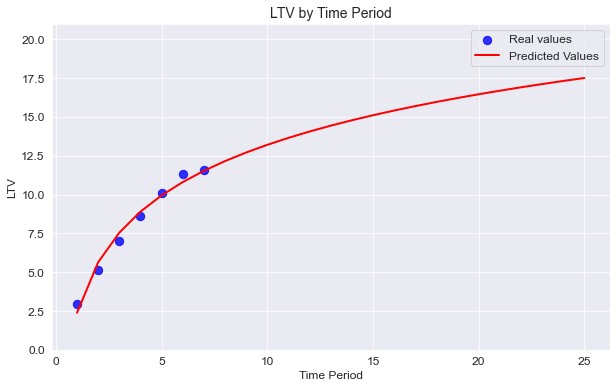

In [19]:
x_pred = np.arange(1, 26, 1)
y_pred = np.polyval(fit, np.log(x_pred))

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.8, s=70, label="Real values")
plt.plot(x_pred, y_pred, color='red', linewidth=2, label="Predicted Values")
plt.title('LTV by Time Period', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('LTV', fontsize=12)
plt.ylim([0, max(y_pred)*1.2])
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)

plt.show()

**4. Calculate ROMI for 4 weeks and for half a year if the cost of attraction
paying user 6 USD.**

In [20]:
# romi = (ltv - cost)/cost * 100%
print(f"ROMI for 4 weeks: {round((ltv_cum.iloc[0,3] - 6)/6 * 100,2)}%")

ROMI for 4 weeks: 16.61%


In [21]:
print(f"ROMI ROMI for six months: {round(((fit[1] + fit[0]*np.log(26)) - 6)/6 * 100,2)}%")

ROMI ROMI for six months: 194.85%
